<br> Project Name </br>
<br> Author </br>
<br> Objective <br>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')

In [2]:
os.chdir(os.path.abspath(os.path.join('..')))

In [3]:
data_path = '../data/mkt_data.csv'

In [4]:
df = pd.read_csv(data_path, index_col=0)

___
<h4> 1. How much data is there? Rows and columns? </h4>

There's 45 columns and 2205 rows.

In [5]:
df.shape

(2205, 43)

___
<h4> 2. What are the numeric columns? </h4>

- Considering binary columns as categorical columns, the numeric columns are:
    - Income
    - Kidhome
    - Teenhome
    - Recency
    - MntWines
    - MntFruits
    - MntMeatProducts
    - MntFishProducts
    - MntSweetProducts
    - MntGoldProds
    - NumDealsPurchases
    - NumWebPurchases
    - NumCatalogPurchases
    - NumStorePurchases
    - NumWebVisitsMonth
    - Z_CostContact (just one unique value)
    - Z_Revenue (just one unique value)
    - Age
    - Customer_Days
    - MntTotal
    - MntRegularProds
    - AcceptedCmpOverall
    - expenses

In [6]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Income[float64],Mean (sd) : 51622.1 (20713.1)min < med < max:1730.0 < 51287.0 < 113734.0IQR (CV) : 33085.0 (2.5),"1,963 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3cMU7DMBiGYYMYuoAydO8OQ6/AGSrO2TNwAu7QnaFj6VImmIqKYkfN5z7PHsnDqzi2lP/udDoVmLv7ay8A/kOoRHi49gKmslqtXodhWI59fr/ff+52u/eGS6JCt6EOw7DcbDZfY5/fbrejI6c9Wz8RhEoEoRJBqETo9jB1TTU3Dm4bzhPqBGpuHNw2nCfUPxwOh+f1ev025tnj8fhSSvlovKSbJtQ/LBaLp4q34mPr9dw6hykizPqNWnMosf32ZdahVh5KIrffmm/jUvq9NZh1qLeo5tu4lH5vDXyjEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9Hfp2jn6hkjwY9JQG8zRjxwiQXsGUHSmZtLKnKesCLUzlVMIZztlxWGKCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQgX/0KtGSJhgAStXAy1ZoiEARJZamYClDLtXAD/9fOrZiZAKdPOBfCNSgShEsHWTzNTzr36BsOnfGqg2FKkAAAAAElFTkSuQmCC"">",0(0.0%)
2,Kidhome[int64],1. 02. 13. 2,"1,276 (57.9%)883 (40.0%)46 (2.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABLElEQVR4nO3bsW3DQBQFQdNQAQwUqxbXoEJZg1thzuBSR3SsArQHiDMVXLDCBwG95TzPLyh8z34A1yE2Msvj8fhZ1/U++yGfboxx7Pv+O/sdM93Wdb0/n8+/2Q/5dNu2Xf4H7YySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nbGOPwx773G2Mcs98w22JdRcUZJSM2MpddV1k79S67rvJR1HNGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MZddV1k496yoyzigZsZERG5mXKZ95G+/0MuW74lcpHWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mi8TPnM23gnUz4yziiZf5brTjDVtHIXAAAAAElFTkSuQmCC"">",0(0.0%)
3,Teenhome[int64],1. 02. 13. 2,"1,139 (51.7%)1,015 (46.0%)51 (2.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bsW0CQRRFUa9FARMQU4troFBqcCvkG0zqCApAQpYFd7XyORVMcNHXSrzldrt9QOFz6wfwf4iNzHI6nb7GGMetH7JXc871er1+b/2OPTiMMY7n8/ln64fs1eVy8UP9JWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mgc5pyrPwD+3Zxz3foNe7FYV1FxRsmIjYx11ROWU69lXfWED6fXckbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx11ROWU69lXUXGGSUjNjJiI/Mw5TNf410epny+THkXZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyDxM+czXeBdTPjLOKJk7lutOMNTuxS8AAAAASUVORK5CYII="">",0(0.0%)
4,Recency[int64],Mean (sd) : 49.0 (28.9)min < med < max:0.0 < 49.0 < 99.0IQR (CV) : 50.0 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABo0lEQVR4nO3ZMUrDYBjH4SgOpaCk4Ch016FX8AwfnjNn8ATewKHgKLRj7VInQRCJfl9L+y/PM7fJS/NL3kAvdrtdB6fu8tgDwF8IlQhXYx+Yz+ePfd/f1hx8vV6/L5fL55rvwnejofZ9f1tK+ag5+DAMVYF/Sb1JUuc+ZaOhHtMxb5IWqXOfspMOlf9reZqvVqu72Wz2VnvuQ26Dg4a62WzuF4vFU+33t9vtQ9d1L3sc6ew1Ps3vSimvtec+5DY4aKiTyeSm9kfruq4bhuF6n/OQy+r/RcsKbdkEyVuoZfax14azDbX1gk+n04dSStUFb9kEyVuoZfax14azDTX5gvOTf6aIIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUInwCmYV1NPhJdIcAAAAASUVORK5CYII="">",0(0.0%)
5,MntWines[int64],Mean (sd) : 306.2 (337.5)min < med < max:0.0 < 178.0 < 1493.0IQR (CV) : 483.0 (0.9),775 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmklEQVR4nO3dvUrDUACG4SoOnSSFjkJ3l9yBeA3Ba+zYa/BGHAqOQjvWqU7+IEjkHIP5Ds8zN0mHl5wfAufifD4vYO4u//sPwG8IlQhXYz/YbDb3XdetS25+PB5f9vv9Y8m18NVoqF3XrYdheC25+W63KwocvjP0E0GoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKh

Convert binary columns into categorical:

In [12]:
df = df.assign(
    AcceptedCmp1=lambda x: x['AcceptedCmp1'].astype(str),
    AcceptedCmp2=lambda x: x['AcceptedCmp2'].astype(str),
    AcceptedCmp3=lambda x: x['AcceptedCmp3'].astype(str),
    AcceptedCmp4=lambda x: x['AcceptedCmp4'].astype(str),
    AcceptedCmp5=lambda x: x['AcceptedCmp5'].astype(str),
    Complain=lambda x: x['Complain'].astype(str),
    Response=lambda x: x['Response'].astype(str),
    marital_Divorced=lambda x: x['marital_Divorced'].astype(str),
    marital_Married=lambda x: x['marital_Married'].astype(str),
    marital_Single=lambda x: x['marital_Single'].astype(str),
    marital_Together=lambda x: x['marital_Together'].astype(str),
    marital_Widow=lambda x: x['marital_Widow'].astype(str),
    education_2n_Cycle= lambda x: x['education_2n Cycle'].astype(str),
    education_Basic=lambda x: x['education_Basic'].astype(str),
    education_Graduation=lambda x: x['education_Graduation'].astype(str),
    education_Master=lambda x: x['education_Master'].astype(str),
    education_PhD=lambda x: x['education_PhD'].astype(str)   
).drop('education_2n Cycle', axis=1)

In [15]:
df.select_dtypes(include=object).columns

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'marital_status',
       'education_level', 'education_2n_Cycle'],
      dtype='object')

___
<h4> 3. Is there duplicate data in the database? If yes, remove it. </h4>

There are 184 duplicated rows.

In [8]:
df.duplicated().sum()

184

In [48]:
df = df.drop_duplicates()
df.shape

(2021, 43)

___
<h4> 4. Are there null values in the database? Do they indicate something? What to do with them? </h4>

There are null values as described below. All null values are related to the column being binary. We should transform the null values into zero.

In [9]:
df.isnull().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Graduation    1092
education_Mast

In [14]:
df.loc[df['marital_Divorced'].isnull(), 'marital_Divorced'] = 0
df.loc[df['marital_Married'].isnull(), 'marital_Married'] = 0
df.loc[df['marital_Single'].isnull(), 'marital_Single'] = 0
df.loc[df['marital_Together'].isnull(), 'marital_Together'] = 0
df.loc[df['marital_Widow'].isnull(), 'marital_Widow'] = 0
df.loc[df['education_2n Cycle'].isnull(), 'education_2n Cycle'] = 0
df.loc[df['education_Basic'].isnull(), 'education_Basic'] = 0
df.loc[df['education_Graduation'].isnull(), 'education_Graduation'] = 0
df.loc[df['education_Master'].isnull(), 'education_Master'] = 0
df.loc[df['education_PhD'].isnull(), 'education_PhD'] = 0

In [15]:
df.marital_Divorced.unique()

array([0., 1.])

___
<h4> 5. What are the mean, median, percentiles 25 and 75, min and max of each numerical column? <h4>

In [17]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,5.336961,3.0,11.0,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753,562.764626
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,2.413535,0.0,0.0,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231,575.936911
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.0,11.0,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,6.000000,3.0,11.0,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,7.000000,3.0,11.0,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,20.000000,3.0,11.0,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


___
<h4> 6. What is the biggest income in the database? </h4>

In [18]:
df.Income.max()

113734.0

___
<h4> 7. What is the distribution of incomes in the database? Are there customers that earn a lot and customers that earn little? </h4>

Yes, there are customers that earn a lot and customer that earn very little.

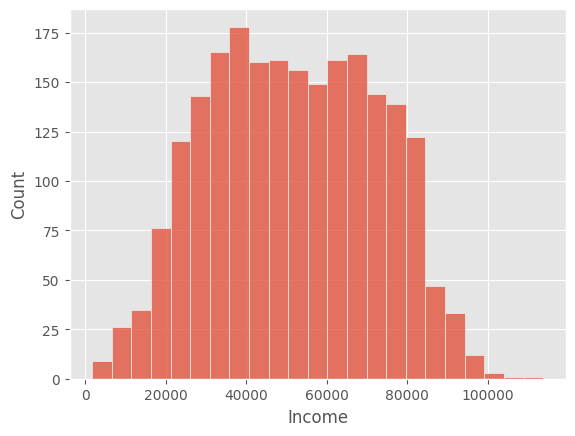

In [19]:
sns.histplot(df['Income']);

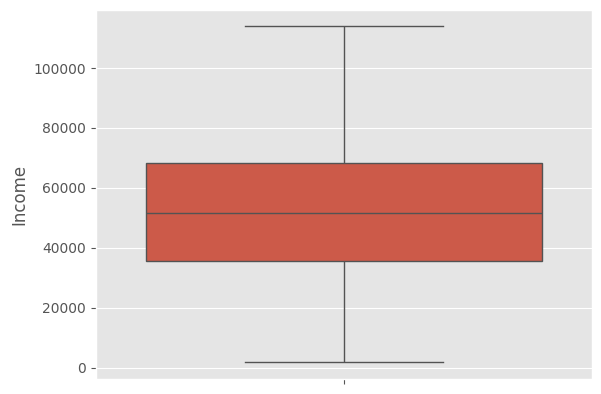

In [49]:
sns.boxplot(df['Income']);

___
<h4> 8. Does the customers have high or low levels of study? </h4>

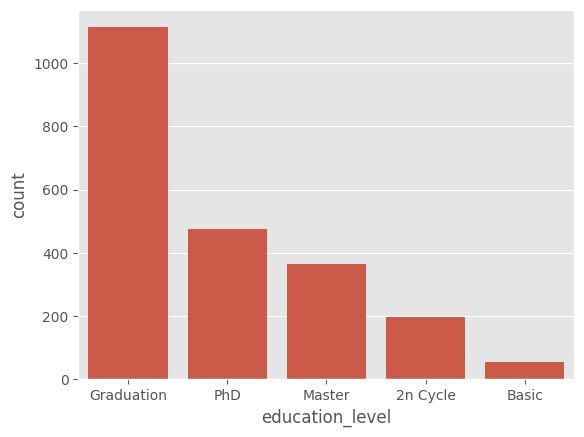

In [33]:
sns.countplot(
    df, 
    x='education_level', 
    order = df['education_level'].value_counts().index
);

___
<h4> 9. How many customers are there in each marital status? </h4>

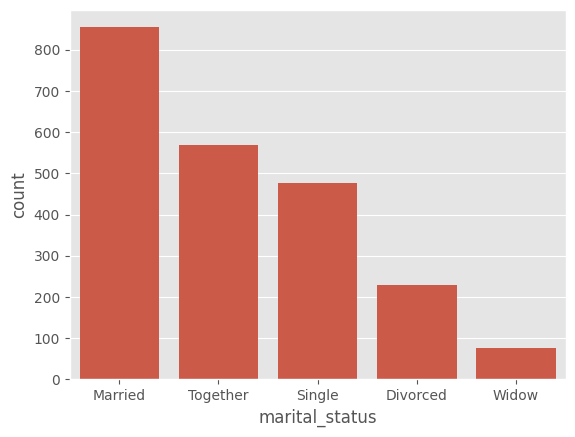

In [34]:
sns.countplot(
    df, 
    x='marital_status', 
    order = df['marital_status'].value_counts().index
);

___
<h4> 10. What is the relation between marital status and number of children? Does married people have more children? </h4>

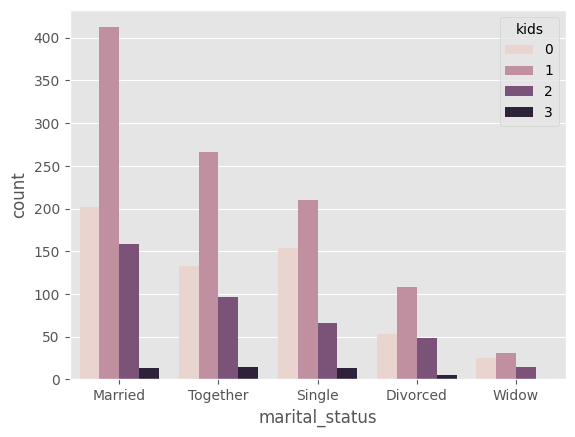

In [55]:
sns.countplot(
    df, 
    x='marital_status', 
    order = df['marital_status'].value_counts().index,
    hue='kids',
);

___
<h4> 11. Do people spend more or less on the platform when they have children? </h4>

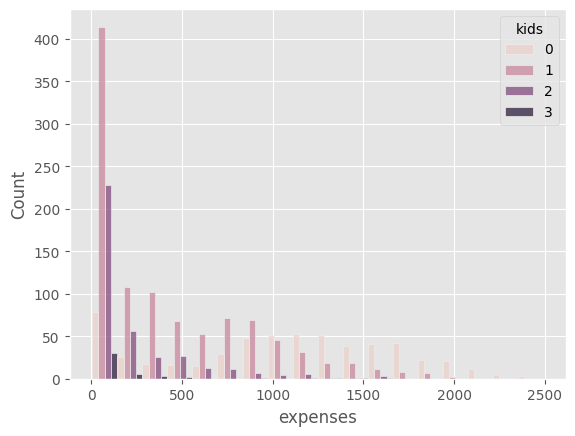

In [54]:
sns.histplot(df, x='expenses', hue='kids', multiple='dodge');

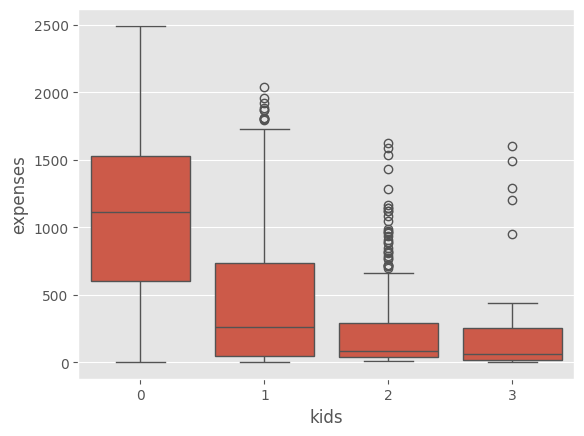

In [53]:
sns.boxplot(df, y='expenses', x='kids');

___
<h4> 12. Do people with higher income spend more? </h4>

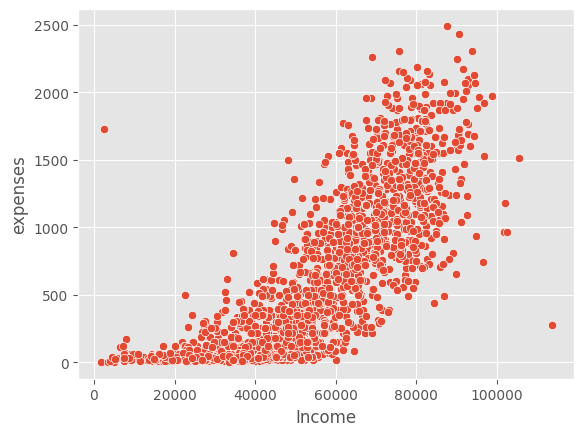

In [43]:
sns.scatterplot(df, x='Income', y='expenses');

In [56]:
df['expenses'].corr(df['Income'])

0.8192029927546325